### CDS: ML Assignment 6 
#### Julius Mannes (s4343093), Tom Sweers (s4584325), Gabriel Raya (s1022212)

### Import TensorFlow

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt

ERROR:root:Line magic function `%tensorflow_version` not found.


### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.


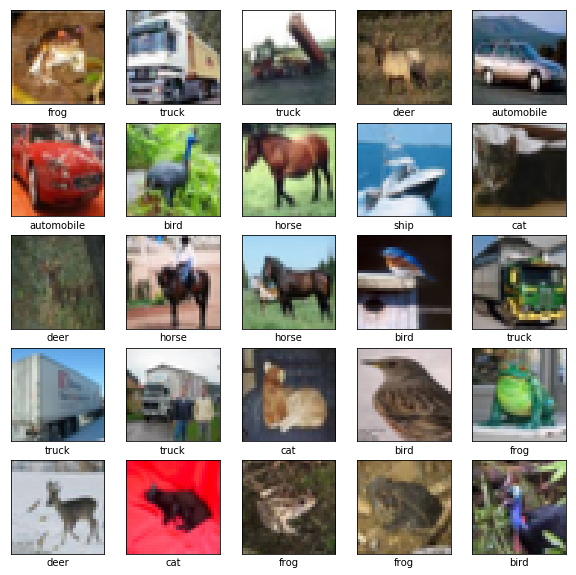

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Part 1 (MLP)
We are asked to modify the given perceptron.py file and experiment with 0,1 and 2 hidden layers. 

### Experiment with 0 hidden layers. 
This is basically what was given in the perceptron.py.
The Optimizer used is Adam. This optimizer adapts the weights using moving averages, which estimate first and second moments. 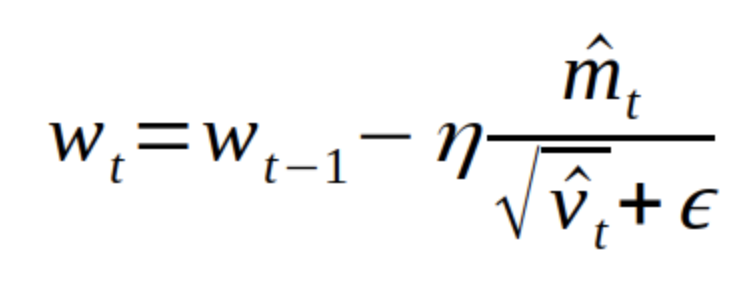
Here m and v are the estimates of first and second moments. Adam has been a popular choice in recent years as it is very successfull and gains performance improvements faster than Stochastic Gradient Descent (SGD), for instance.
<cite>https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c</cite> At default the learning rate is initialized at 0.001. 
The weights are initialized by default according to the Glorot uniform distribution. 
Glorot initializes the weights according to the following formula: 
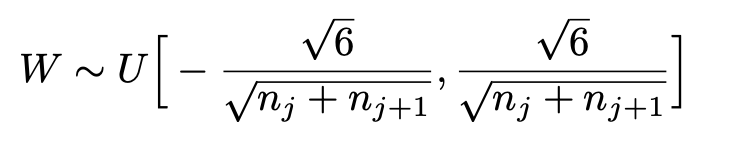

Here n<sub>j</sub> denotes the amount input nodes to the j<sup>th</sup> weight vector and n<sub>j+1</sub> denotes the amount of output nodes. 

This initialization approach preserves variance in activation and gradients.  <cite>http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf</cite>

In [39]:
#This is the modified perceptron.py
# 0 hidden layers (what was given...)
##we add the following to save the best weights and be able to evaluate early stopping.  
from keras.callbacks import ModelCheckpoint

mcp_save = ModelCheckpoint('best_weights.hdf5', save_best_only=True, monitor='val_loss', mode='min')

model = models.Sequential([
    layers.Flatten(),
    layers.Dense(10, activation='softmax')])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=100,
                    validation_data=(test_images, test_labels),callbacks=[mcp_save])



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 134us/step - loss: 1.9601 - acc: 0.3172 - val_loss: 2.0545 - val_acc: 0.2920
Epoch 2/100
50000/50000 [==============================] - 4s 71us/step - loss: 1.8736 - acc: 0.3531 - val_loss: 1.9049 - val_acc: 0.3400
Epoch 3/100
50000/50000 [==============================] - 4s 73us/step - loss: 1.8567 - acc: 0.3620 - val_loss: 1.7998 - val_acc: 0.3842
Epoch 4/100
50000/50000 [==============================] - 4s 71us/step - loss: 1.8452 - acc: 0.3662 - val_loss: 1.9583 - val_acc: 0.3266
Epoch 5/100
50000/50000 [==============================] - 4s 71us/step - loss: 1.8438 - acc: 0.3728 - val_loss: 1.8732 - val_acc: 0.3390
Epoch 6/100
50000/50000 [==============================] - 4s 72us/step - loss: 1.8188 - acc: 0.3800 - val_loss: 1.8773 - val_acc: 0.3390
Epoch 7/100
50000/50000 [==============================] - 4s 73us/step - loss: 1.8234 - acc: 0.3770 - val_loss: 1.8207 -

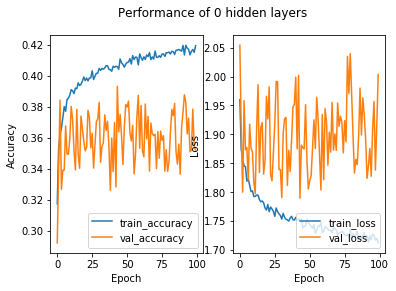

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Performance of 0 hidden layers')

ax1.plot(history.history['acc'], label='train_accuracy')
ax1.plot(history.history['val_acc'], label = 'val_accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')

ax2.plot(history.history['loss'], label='train_loss')
ax2.plot(history.history['val_loss'], label = 'val_loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='lower right')

plt.show()

In [41]:
#first we evaluate on the last weights of the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_loss: "+str(test_loss) + '\n' + "test_acc: "+ str(test_acc))
model.load_weights('best_weights.hdf5')
best_test_loss, best_test_acc = model.evaluate(test_images, test_labels)
print("best_test_loss: "+str(best_test_loss) + '\n' + "best_test_acc: "+ str(best_test_acc))




10000/10000 [==============================] - 0s 37us/step
test_loss: 2.003669347000122
test_acc: 0.352
10000/10000 [==============================] - 0s 31us/step
best_test_loss: 1.7892036600112915
best_test_acc: 0.3932


### Evaluation of 0 hidden layers:
As is visible from the above printed results, and in the plots, the best parameters were found to predict the image with a test accuracy of 0.3932. These weights stem from iteration 44.

Is early stopping convenient in this application?
It depends on the patience one uses for early stopping. A patience of only 5 epochs, would not yield the best result that we have achieved here. However, after epoch 44, the model ran for 56 more epochs without improvement. Therefore early stopping would have saved quite some time. But as mentioned, the patience needs to be big enough. To illustrate: A best intermediate result was found at epoch 11, until epoch 31 this result was not improved. So even a patience of, say 15, would not have been a large enough choice. 

From the plots it is visible that the training accuracy and loss keep diverging more and more from the validation accuracy and loss, since this pattern is going to continue, it is unlikely that we will achieve much better results in future iterations. 


### Experiment with 1 hidden layers. 
The Optimizer used is Adam, and it begins with the default learning rate of 0.001. The weights are also initialized by default according to glorot uniform distribution. The hidden layer consists of 512 nodes. The activation function used is the relu function in the hidden layer and a softmax in the final layer to obtain normalized probabilities. 

In [45]:
#This is the modified perceptron.py
# 1 hidden layers 
##we add the following to save the best weights and be able to evaluate early stopping.  
from keras.callbacks import ModelCheckpoint

mcp_save = ModelCheckpoint('best_weights.hdf5', save_best_only=True, monitor='val_loss', mode='min')

model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=100,
                    validation_data=(test_images, test_labels),callbacks=[mcp_save])




Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 31s 629us/step - loss: 1.8934 - acc: 0.3252 - val_loss: 1.7426 - val_acc: 0.3783
Epoch 2/100
50000/50000 [==============================] - 31s 621us/step - loss: 1.7002 - acc: 0.3926 - val_loss: 1.6539 - val_acc: 0.4084
Epoch 3/100
50000/50000 [==============================] - 30s 604us/step - loss: 1.6260 - acc: 0.4224 - val_loss: 1.6018 - val_acc: 0.4233
Epoch 4/100
50000/50000 [==============================] - 31s 628us/step - loss: 1.5801 - acc: 0.4383 - val_loss: 1.5722 - val_acc: 0.4416
Epoch 5/100
50000/50000 [==============================] - 28s 557us/step - loss: 1.5519 - acc: 0.4454 - val_loss: 1.5588 - val_acc: 0.4471
Epoch 6/100
50000/50000 [==============================] - 30s 596us/step - loss: 1.5304 - acc: 0.4562 - val_loss: 1.5369 - val_acc: 0.4572
Epoch 7/100
50000/50000 [==============================] - 29s 571us/step - loss: 1.5117 - acc: 0.4619 - val_l

Epoch 59/100
50000/50000 [==============================] - 27s 535us/step - loss: 1.2815 - acc: 0.5424 - val_loss: 1.5177 - val_acc: 0.4692
Epoch 60/100
50000/50000 [==============================] - 29s 575us/step - loss: 1.2785 - acc: 0.5420 - val_loss: 1.5066 - val_acc: 0.4827
Epoch 61/100
50000/50000 [==============================] - 27s 538us/step - loss: 1.2765 - acc: 0.5421 - val_loss: 1.4951 - val_acc: 0.4843
Epoch 62/100
50000/50000 [==============================] - 26s 525us/step - loss: 1.2777 - acc: 0.5423 - val_loss: 1.5346 - val_acc: 0.4708
Epoch 63/100
50000/50000 [==============================] - 26s 518us/step - loss: 1.2739 - acc: 0.5440 - val_loss: 1.5378 - val_acc: 0.4695
Epoch 64/100
50000/50000 [==============================] - 26s 523us/step - loss: 1.2734 - acc: 0.5446 - val_loss: 1.5333 - val_acc: 0.4727
Epoch 65/100
50000/50000 [==============================] - 26s 527us/step - loss: 1.2681 - acc: 0.5455 - val_loss: 1.5290 - val_acc: 0.4714
Epoch 66/100


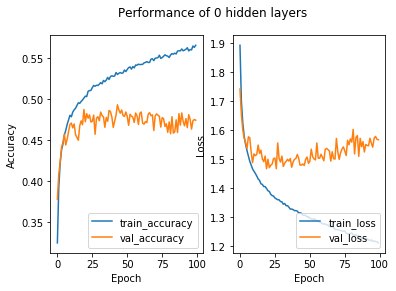

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Performance of 0 hidden layers')

ax1.plot(history.history['acc'], label='train_accuracy')
ax1.plot(history.history['val_acc'], label = 'val_accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')

ax2.plot(history.history['loss'], label='train_loss')
ax2.plot(history.history['val_loss'], label = 'val_loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='lower right')

plt.show()

In [47]:
#first we evaluate on the last weights of the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_loss: "+str(test_loss) + '\n' + "test_acc: "+ str(test_acc))
model.load_weights('best_weights.hdf5')
best_test_loss, best_test_acc = model.evaluate(test_images, test_labels)
print("best_test_loss: "+str(best_test_loss) + '\n' + "best_test_acc: "+ str(best_test_acc))





10000/10000 [==============================] - 1s 115us/step
test_loss: 1.5677319553375244
test_acc: 0.4743
10000/10000 [==============================] - 1s 111us/step
best_test_loss: 1.4677813482284545
best_test_acc: 0.4805


### Evaluation of 1 hidden layers:
As is visible from the above printed results, and in the plots, the best parameters were found to predict the image with a test accuracy of 0.4805, which is a big improvement compared to no hidden layer with accuracy of 0.3847. These weights stem from iteration 44. Our result is about 0.025 worse than the result achieved with the same parameter sized model in https://arxiv.org/pdf/1611.03530.pdf. We will investigate in the second part of the assignment as to how we can improve upon them. 

Is early stopping convenient in this application?
In this case, we found that a smaller patience would have sufficed compared to the 0 hidden layer experiment. There were not such long sequences of non-improving epochs as in the previous experiment. Again, after epoch 44, the model ran for 56 more epochs without improvement. Therefore early stopping would have saved quite some time. 

From the plots it is visible that the training accuracy and loss keep diverging more and more from the validation accuracy and loss, since this pattern is probably going to continue, it is unlikely that we will achieve much better results in future iterations. This is most likely due to overfitting. 



### Experiment with 2 hidden layers. 
The Optimizer used is Adam, and it begins with the default learning rate of 0.001. 
We use a hidden layer with 128 and one with 256 nodes. We are restricted to 1 hour of CPU time. The weights are also initialized by default according to glorot uniform distribution. 

In [51]:
#This is the modified perceptron.py
# 0 hidden layers (what was given...)
##we add the following to save the best weights and be able to evaluate early stopping.  
from keras.callbacks import ModelCheckpoint

mcp_save = ModelCheckpoint('best_weights.hdf5', save_best_only=True, monitor='val_loss', mode='min')

model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=100,
                    validation_data=(test_images, test_labels),callbacks=[mcp_save])





Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 37s 749us/step - loss: 1.8489 - acc: 0.3292 - val_loss: 1.6961 - val_acc: 0.3840
Epoch 2/100
50000/50000 [==============================] - 35s 701us/step - loss: 1.6788 - acc: 0.3949 - val_loss: 1.6326 - val_acc: 0.4123
Epoch 3/100
50000/50000 [==============================] - 34s 671us/step - loss: 1.5993 - acc: 0.4245 - val_loss: 1.5794 - val_acc: 0.4360
Epoch 4/100
50000/50000 [==============================] - 32s 643us/step - loss: 1.5574 - acc: 0.4417 - val_loss: 1.5448 - val_acc: 0.4493
Epoch 5/100
50000/50000 [==============================] - 32s 643us/step - loss: 1.5221 - acc: 0.4532 - val_loss: 1.5065 - val_acc: 0.4638
Epoch 6/100
50000/50000 [==============================] - 33s 655us/step - loss: 1.4971 - acc: 0.4644 - val_loss: 1.5213 - val_acc: 0.4611
Epoch 7/100
50000/50000 [==============================] - 32s 650us/step - loss: 1.4751 - acc: 0.4746 - val_l

Epoch 59/100
50000/50000 [==============================] - 29s 583us/step - loss: 1.1599 - acc: 0.5827 - val_loss: 1.7391 - val_acc: 0.4622
Epoch 60/100
50000/50000 [==============================] - 29s 583us/step - loss: 1.1606 - acc: 0.5813 - val_loss: 1.6470 - val_acc: 0.4815
Epoch 61/100
50000/50000 [==============================] - 29s 583us/step - loss: 1.1596 - acc: 0.5822 - val_loss: 1.6653 - val_acc: 0.4742
Epoch 62/100
50000/50000 [==============================] - 29s 583us/step - loss: 1.1577 - acc: 0.5809 - val_loss: 1.7021 - val_acc: 0.4728
Epoch 63/100
50000/50000 [==============================] - 34s 683us/step - loss: 1.1571 - acc: 0.5845 - val_loss: 1.6494 - val_acc: 0.4681
Epoch 64/100
50000/50000 [==============================] - 39s 778us/step - loss: 1.1532 - acc: 0.5854 - val_loss: 1.7178 - val_acc: 0.4715
Epoch 65/100
50000/50000 [==============================] - 34s 684us/step - loss: 1.1465 - acc: 0.5852 - val_loss: 1.6690 - val_acc: 0.4719
Epoch 66/100


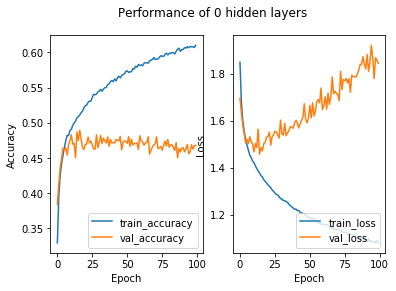

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Performance of 0 hidden layers')

ax1.plot(history.history['acc'], label='train_accuracy')
ax1.plot(history.history['val_acc'], label = 'val_accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')

ax2.plot(history.history['loss'], label='train_loss')
ax2.plot(history.history['val_loss'], label = 'val_loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='lower right')

plt.show()

In [53]:
#first we evaluate on the last weights of the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_loss: "+str(test_loss) + '\n' + "test_acc: "+ str(test_acc))
model.load_weights('best_weights.hdf5')
best_test_loss, best_test_acc = model.evaluate(test_images, test_labels)
print("best_test_loss: "+str(best_test_loss) + '\n' + "best_test_acc: "+ str(best_test_acc))






10000/10000 [==============================] - 1s 148us/step
test_loss: 1.8447132152557373
test_acc: 0.4679
10000/10000 [==============================] - 1s 147us/step
best_test_loss: 1.4579067630767821
best_test_acc: 0.4868


### Evaluation of 2 hidden layers:
As is visible from the above printed results, and in the plots, the best parameters were found to predict the image with a test accuracy of 0.4868, which is a very small improvement compared to 1 hidden layer with accuracy of 0.4805. These weights stem from iteration 17. 

Is early stopping convenient in this application?
We can see a pattern emerging, that is, the more layers and with that the more parameters, the more reliable one could use early stopping. In this case the best performance was already reached after 17 iterations, so one could have saved 83 iterations. With 1 hidden layer, we would already be able to use a much smaller patience compared to 0 hidden layers. With 2 hidden layers, a patience of 5 iterations would have sufficed. 

From the plots it is visible that the training accuracy and loss keep diverging more and more from the validation accuracy and loss, since this pattern is going to continue, it is unlikely that we will achieve much better results in future iterations. This is likely due to overfitting. 



## Part 2 (Try our best to beat the baseline) 
We are asked to run the MLP with one hidden layer and compare our models performance with the results in Table 1 of https://arxiv.org/pdf/1611.03530.pdf. Their model uses a hidden layer of 512 nodes. We have 1000 Epochs or 2 hours of CPU time for training. 

As a first attempt, we will reuse the model with 1-hidden layer and use SGD instead of Adam. In the paper that we compare to, they also used SGD. The only change we do is to introduce a decreasing learning rate, once improvement in validation loss has plateaued. We decrease the learning rate starting from 0.01 every time we had 5 consecutive iterations without improvement by a factor of 0.5 with a minimum learning rate of 0.000001. At that point the network has basically stopped learning, we could effectively use early stopping then. 

In [4]:
#This is the modified perceptron.py
# 1 hidden layers 
##we add the following to save the best weights and be able to evaluate early stopping.  
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
mcp_save = ModelCheckpoint('best_weights.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.000001, verbose=1)
#sgd = optimizers.SGD(lr=0.01)

model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=100,
                    validation_data=(test_images, test_labels),callbacks=[mcp_save,reduce_lr])





Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 15s 293us/step - loss: 1.8602 - acc: 0.3372 - val_loss: 1.7518 - val_acc: 0.3796
Epoch 2/100
50000/50000 [==============================] - 15s 291us/step - loss: 1.6845 - acc: 0.4026 - val_loss: 1.6536 - val_acc: 0.4143
Epoch 3/100
50000/50000 [==============================] - 13s 266us/step - loss: 1.6076 - acc: 0.4367 - val_loss: 1.5598 - val_acc: 0.4588
Epoch 4/100
50000/50000 [==============================] - 15s 300us/step - loss: 1.5557 - acc: 0.4545 - val_loss: 1.5625 - val_acc: 0.4426
Epoch 5/100
50000/50000 [==============================] - 14s 290us/step - loss: 1.5143 - acc: 0.4683 - val_loss: 1.5653 - val_acc: 0.4419
Epoch 6/100
50000/50000 [==============================] - 15s 307us/step - loss: 1.4794 - acc: 0.4820 - val_loss: 1.5870 - val_acc: 0.4318
Epoch 7/100
50000/50000 [==============================] - 15s 299us/step - loss: 1.4495 - acc: 0.4899 - val_l

50000/50000 [==============================] - 14s 281us/step - loss: 0.8569 - acc: 0.7192 - val_loss: 1.2709 - val_acc: 0.5541
Epoch 57/100
50000/50000 [==============================] - 14s 277us/step - loss: 0.8559 - acc: 0.7197 - val_loss: 1.2750 - val_acc: 0.5576
Epoch 58/100
50000/50000 [==============================] - 13s 269us/step - loss: 0.8546 - acc: 0.7191 - val_loss: 1.2716 - val_acc: 0.5541
Epoch 59/100
50000/50000 [==============================] - 14s 281us/step - loss: 0.8535 - acc: 0.7199 - val_loss: 1.2682 - val_acc: 0.5577
Epoch 60/100
50000/50000 [==============================] - 14s 281us/step - loss: 0.8520 - acc: 0.7197 - val_loss: 1.2702 - val_acc: 0.5562
Epoch 61/100
50000/50000 [==============================] - 14s 283us/step - loss: 0.8508 - acc: 0.7217 - val_loss: 1.2731 - val_acc: 0.5562
Epoch 62/100
50000/50000 [==============================] - 14s 282us/step - loss: 0.8496 - acc: 0.7212 - val_loss: 1.2725 - val_acc: 0.5557
Epoch 63/100
50000/50000 [

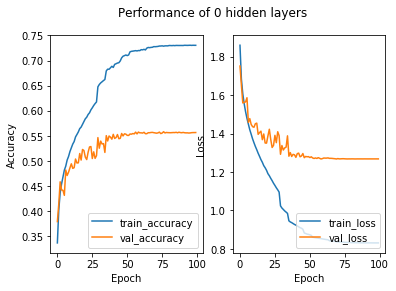

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Performance of 0 hidden layers')

ax1.plot(history.history['acc'], label='train_accuracy')
ax1.plot(history.history['val_acc'], label = 'val_accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')

ax2.plot(history.history['loss'], label='train_loss')
ax2.plot(history.history['val_loss'], label = 'val_loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='lower right')

plt.show()

In [6]:
#first we evaluate on the last weights of the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_loss: "+str(test_loss) + '\n' + "test_acc: "+ str(test_acc))
model.load_weights('best_weights.hdf5')
best_test_loss, best_test_acc = model.evaluate(test_images, test_labels)
print("best_test_loss: "+str(best_test_loss) + '\n' + "best_test_acc: "+ str(best_test_acc))

10000/10000 [==============================] - 1s 95us/step
test_loss: 1.2685090761184692
test_acc: 0.5568
10000/10000 [==============================] - 1s 81us/step
best_test_loss: 1.2680307125091552
best_test_acc: 0.5565


We were able to beat the baseline of 50.5 by about 5%. The only thing we have introduced to the model was the learning rate decay, which seems to have done the trick. The improved performance of this network compared to the above networks that used the Adam optimizer, give a hint that SGD might perform better than Adam. This is something that is also hinted at in <cite>https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c</cite> , an overview of the Adam optimizer. Interestingly, it seems that particularly on the CIFAR10 Dataset, which we use for this exercise, SGD outperforms Adam. The above print statement show that the weights that performed best on the validation set, perform slightly worse on the test set, than the very last weight iteration. This is a nice example of the variance of results between training, validation and test set. Having observed that we reached the minimum learning rate towards 1/2 of the process, let's make the hidden layer contain more nodes, but introduce early stopping to stay within 2 hour of cpu time. 

In [8]:
#This is the modified perceptron.py
# 1 hidden layers 
##we add the following to save the best weights and be able to evaluate early stopping.  
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
mcp_save = ModelCheckpoint('best_weights.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.000001, verbose=1)
earl_stop= EarlyStopping(monitor='val_loss',
                              patience=10,
                              verbose=1)
#sgd = optimizers.SGD(lr=0.01)

model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=100,
                    validation_data=(test_images, test_labels),callbacks=[mcp_save,reduce_lr,earl_stop])






Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 30s 603us/step - loss: 1.8542 - acc: 0.3421 - val_loss: 1.7642 - val_acc: 0.3703
Epoch 2/100
50000/50000 [==============================] - 28s 558us/step - loss: 1.6703 - acc: 0.4139 - val_loss: 1.6299 - val_acc: 0.4334
Epoch 3/100
50000/50000 [==============================] - 30s 602us/step - loss: 1.5933 - acc: 0.4443 - val_loss: 1.6192 - val_acc: 0.4250
Epoch 4/100
50000/50000 [==============================] - 29s 589us/step - loss: 1.5389 - acc: 0.4621 - val_loss: 1.5785 - val_acc: 0.4406
Epoch 5/100
50000/50000 [==============================] - 30s 596us/step - loss: 1.4951 - acc: 0.4781 - val_loss: 1.5704 - val_acc: 0.4415
Epoch 6/100
50000/50000 [==============================] - 30s 597us/step - loss: 1.4608 - acc: 0.4890 - val_loss: 1.4683 - val_acc: 0.4833
Epoch 7/100
50000/50000 [==============================] - 29s 590us/step - loss: 1.4268 - acc: 0.5008 - val_l

50000/50000 [==============================] - 29s 577us/step - loss: 0.8333 - acc: 0.7315 - val_loss: 1.2751 - val_acc: 0.5507
Epoch 58/100
50000/50000 [==============================] - 30s 598us/step - loss: 0.8305 - acc: 0.7327 - val_loss: 1.2630 - val_acc: 0.5566
Epoch 59/100
50000/50000 [==============================] - 34s 690us/step - loss: 0.8277 - acc: 0.7330 - val_loss: 1.2658 - val_acc: 0.5549
Epoch 60/100
50000/50000 [==============================] - 27s 531us/step - loss: 0.8253 - acc: 0.7339 - val_loss: 1.2655 - val_acc: 0.5573
Epoch 61/100
50000/50000 [==============================] - 26s 528us/step - loss: 0.8226 - acc: 0.7363 - val_loss: 1.2649 - val_acc: 0.5588
Epoch 62/100
50000/50000 [==============================] - 27s 539us/step - loss: 0.8203 - acc: 0.7358 - val_loss: 1.2763 - val_acc: 0.5558
Epoch 63/100
50000/50000 [==============================] - 27s 532us/step - loss: 0.8177 - acc: 0.7387 - val_loss: 1.2634 - val_acc: 0.5591

Epoch 00063: ReduceLROnPl

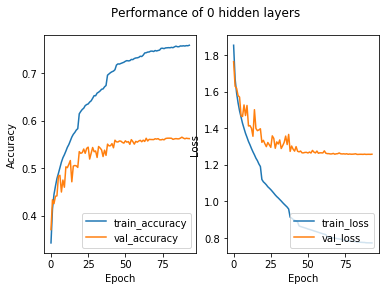

10000/10000 [==============================] - 2s 172us/step
test_loss: 1.2579137460708618
test_acc: 0.5624
10000/10000 [==============================] - 2s 162us/step
best_test_loss: 1.2569628242492676
best_test_acc: 0.5618


In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Performance of 0 hidden layers')

ax1.plot(history.history['acc'], label='train_accuracy')
ax1.plot(history.history['val_acc'], label = 'val_accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')

ax2.plot(history.history['loss'], label='train_loss')
ax2.plot(history.history['val_loss'], label = 'val_loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='lower right')

plt.show()

#first we evaluate on the last weights of the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_loss: "+str(test_loss) + '\n' + "test_acc: "+ str(test_acc))
model.load_weights('best_weights.hdf5')
best_test_loss, best_test_acc = model.evaluate(test_images, test_labels)
print("best_test_loss: "+str(best_test_loss) + '\n' + "best_test_acc: "+ str(best_test_acc))

As is visible from the last print statement, we were able to improve our model in terms of test accuracy by about 0.5%. This is not that much of an improvement. Since we stayed within the bounds of the 2 hour CPU time of the assignment, we will try once more a layer with more nodes. We do not expect a large improvement however, as the improvement of this model was also rather small. 

In [10]:
#This is the modified perceptron.py
# 1 hidden layers 
##we add the following to save the best weights and be able to evaluate early stopping.  
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
mcp_save = ModelCheckpoint('best_weights.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.000001, verbose=1)
earl_stop= EarlyStopping(monitor='val_loss',
                              patience=10,
                              verbose=1)
#sgd = optimizers.SGD(lr=0.01)

model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=100,
                    validation_data=(test_images, test_labels),callbacks=[mcp_save,reduce_lr,earl_stop])







Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 65s 1ms/step - loss: 1.8399 - acc: 0.3460 - val_loss: 1.7070 - val_acc: 0.3915
Epoch 2/100
50000/50000 [==============================] - 59s 1ms/step - loss: 1.6597 - acc: 0.4206 - val_loss: 1.6269 - val_acc: 0.4355
Epoch 3/100
50000/50000 [==============================] - 59s 1ms/step - loss: 1.5796 - acc: 0.4472 - val_loss: 1.6052 - val_acc: 0.4235
Epoch 4/100
50000/50000 [==============================] - 60s 1ms/step - loss: 1.5271 - acc: 0.4671 - val_loss: 1.5370 - val_acc: 0.4606
Epoch 5/100
50000/50000 [==============================] - 61s 1ms/step - loss: 1.4830 - acc: 0.4815 - val_loss: 1.4962 - val_acc: 0.4677
Epoch 6/100
50000/50000 [==============================] - 57s 1ms/step - loss: 1.4454 - acc: 0.4966 - val_loss: 1.4964 - val_acc: 0.4646
Epoch 7/100
50000/50000 [==============================] - 61s 1ms/step - loss: 1.4141 - acc: 0.5062 - val_loss: 1.5111 - 

50000/50000 [==============================] - 54s 1ms/step - loss: 0.7859 - acc: 0.7534 - val_loss: 1.2477 - val_acc: 0.5670
Epoch 57/100
50000/50000 [==============================] - 54s 1ms/step - loss: 0.7844 - acc: 0.7556 - val_loss: 1.2452 - val_acc: 0.5688
Epoch 58/100
50000/50000 [==============================] - 55s 1ms/step - loss: 0.7833 - acc: 0.7546 - val_loss: 1.2477 - val_acc: 0.5694
Epoch 59/100
50000/50000 [==============================] - 60s 1ms/step - loss: 0.7815 - acc: 0.7560 - val_loss: 1.2436 - val_acc: 0.5654
Epoch 60/100
50000/50000 [==============================] - 58s 1ms/step - loss: 0.7798 - acc: 0.7555 - val_loss: 1.2445 - val_acc: 0.5679

Epoch 00060: ReduceLROnPlateau reducing learning rate to 0.0003124999930150807.
Epoch 61/100
50000/50000 [==============================] - 59s 1ms/step - loss: 0.7741 - acc: 0.7596 - val_loss: 1.2424 - val_acc: 0.5707
Epoch 62/100
50000/50000 [==============================] - 58s 1ms/step - loss: 0.7731 - acc: 0.7

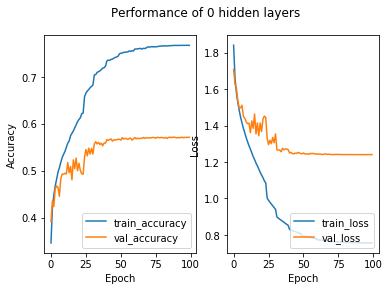

10000/10000 [==============================] - 3s 324us/step
test_loss: 1.240422523498535
test_acc: 0.5713
10000/10000 [==============================] - 3s 327us/step
best_test_loss: 1.2403572591781615
best_test_acc: 0.571


In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Performance of 0 hidden layers')

ax1.plot(history.history['acc'], label='train_accuracy')
ax1.plot(history.history['val_acc'], label = 'val_accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')

ax2.plot(history.history['loss'], label='train_loss')
ax2.plot(history.history['val_loss'], label = 'val_loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='lower right')

plt.show()

#first we evaluate on the last weights of the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_loss: "+str(test_loss) + '\n' + "test_acc: "+ str(test_acc))
model.load_weights('best_weights.hdf5')
best_test_loss, best_test_acc = model.evaluate(test_images, test_labels)
print("best_test_loss: "+str(best_test_loss) + '\n' + "best_test_acc: "+ str(best_test_acc))

We were able to gain another 0.01 in test accuracy. Actually we just figured out that our implemented learning rate decay interferes with our implemented early stopping. But since validation loss improved up until epoch 88, we do not see a reason to rerun the network. The training procedure for 100 epochs, took roughly 100 minutes, so there is also not much reason to experiment with even more nodes. Overall we were able to improve the accuracy on the test set by about 0.065 compared to the baseline. 

## Part 3 (ConvNet)
We are asked to compare results on the given ConvNet when using ReLu or tanh() as activation functions. 
Also, we should experiment with at least two different optimizers and report results. 
The following code was given. 

### Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure our CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to our first layer.



In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

### Add Dense layers on top
To complete our model, you will feed the last output tensor from the convolutional base (of shape (3, 3, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs and a softmax activation.

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Here's the complete architecture of our model.

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                65600     
__________

### Compile and train the model

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 54s 1ms/step - loss: 1.5504 - acc: 0.4305 - val_loss: 1.2869 - val_acc: 0.5374
Epoch 2/10
50000/50000 [==============================] - 56s 1ms/step - loss: 1.2032 - acc: 0.5723 - val_loss: 1.0990 - val_acc: 0.6097
Epoch 3/10
50000/50000 [==============================] - 59s 1ms/step - loss: 1.0533 - acc: 0.6300 - val_loss: 1.0001 - val_acc: 0.6508
Epoch 4/10
50000/50000 [==============================] - 56s 1ms/step - loss: 0.9603 - acc: 0.6634 - val_loss: 0.9753 - val_acc: 0.6604TA: 2s - loss: 0.9616 - acc: 0 - ETA:
Epoch 5/10
50000/50000 [==============================] - 56s 1ms/step - loss: 0.8921 - acc: 0.6864 - val_loss: 0.9598 - val_acc: 0.6645
Epoch 6/10
50000/50000 [==============================] - 60s 1ms/step - loss: 0.8317 - acc: 0.7082 - val_loss: 0.8828 - val_acc: 0.6964
Epoch 7/10
50000/50000 [==============================] - 56s 1ms/step - loss: 0.7886 - acc

### Evaluate the model

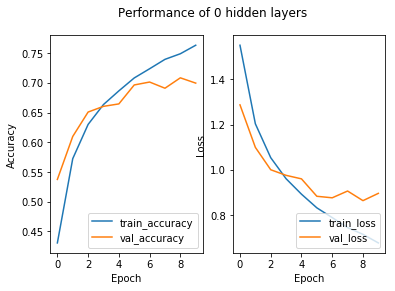

10000/10000 [==============================] - 4s 357us/step
test_loss: 0.895727027797699
test_acc: 0.6995


In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Performance of 0 hidden layers')

ax1.plot(history.history['acc'], label='train_accuracy')
ax1.plot(history.history['val_acc'], label = 'val_accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')

ax2.plot(history.history['loss'], label='train_loss')
ax2.plot(history.history['val_loss'], label = 'val_loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='lower right')

plt.show()

#first we evaluate on the last weights of the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_loss: "+str(test_loss) + '\n' + "test_acc: "+ str(test_acc))

The given CNN from the assignment, reaches an accuracy on the test set of about 70%. Let's experiment with different settings observe the effects!

#### The same but then with tanh instead of ReLu

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))



In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 56s 1ms/step - loss: 1.4100 - acc: 0.5018 - val_loss: 1.2751 - val_acc: 0.5478
Epoch 2/10
50000/50000 [==============================] - 58s 1ms/step - loss: 1.1281 - acc: 0.6075 - val_loss: 1.1355 - val_acc: 0.6118
Epoch 3/10
50000/50000 [==============================] - 69s 1ms/step - loss: 1.0329 - acc: 0.6399 - val_loss: 1.0600 - val_acc: 0.6319
Epoch 4/10
50000/50000 [==============================] - 63s 1ms/step - loss: 0.9621 - acc: 0.6649 - val_loss: 1.0038 - val_acc: 0.6565
Epoch 5/10
50000/50000 [==============================] - 62s 1ms/step - loss: 0.9085 - acc: 0.6837 - val_loss: 0.9901 - val_acc: 0.6588
Epoch 6/10
50000/50000 [==============================] - 75s 2ms/step - loss: 0.8663 - acc: 0.6991 - val_loss: 0.9754 - val_acc: 0.6684
Epoch 7/10
50000/50000 [==============================] - 68s 1ms/step - loss: 0.8217 - acc: 0.7146 - val_loss: 0.9949 - val_acc

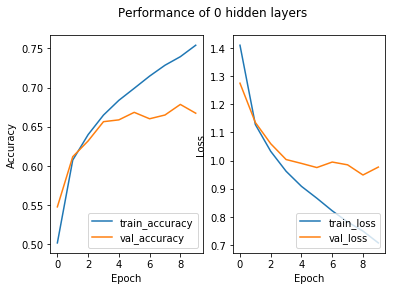

10000/10000 [==============================] - 4s 374us/step
test_loss: 0.9769816336631775
test_acc: 0.6673


In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Performance of 0 hidden layers')

ax1.plot(history.history['acc'], label='train_accuracy')
ax1.plot(history.history['val_acc'], label = 'val_accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')

ax2.plot(history.history['loss'], label='train_loss')
ax2.plot(history.history['val_loss'], label = 'val_loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='lower right')

plt.show()

#first we evaluate on the last weights of the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_loss: "+str(test_loss) + '\n' + "test_acc: "+ str(test_acc))

#### ReLu again but with SGD as optimizer instead of Adam

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))




In [17]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 55s 1ms/step - loss: 2.0560 - acc: 0.2477 - val_loss: 2.0735 - val_acc: 0.2634
Epoch 2/10
50000/50000 [==============================] - 57s 1ms/step - loss: 1.6968 - acc: 0.3879 - val_loss: 1.5450 - val_acc: 0.4347
Epoch 3/10
50000/50000 [==============================] - 58s 1ms/step - loss: 1.4946 - acc: 0.4600 - val_loss: 1.3829 - val_acc: 0.5011
Epoch 4/10
50000/50000 [==============================] - 58s 1ms/step - loss: 1.3810 - acc: 0.5029 - val_loss: 1.3303 - val_acc: 0.5278
Epoch 5/10
50000/50000 [==============================] - 59s 1ms/step - loss: 1.2938 - acc: 0.5410 - val_loss: 1.3218 - val_acc: 0.5286
Epoch 6/10
50000/50000 [==============================] - 59s 1ms/step - loss: 1.2162 - acc: 0.5720 - val_loss: 1.2099 - val_acc: 0.5675
Epoch 7/10
50000/50000 [==============================] - 61s 1ms/step - loss: 1.1531 - acc: 0.5944 - val_loss: 1.1466 - val_acc

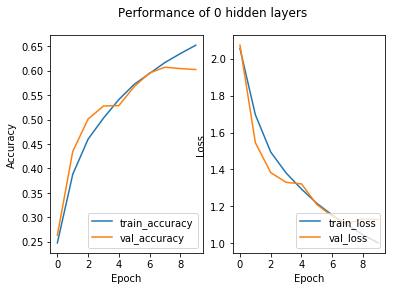

10000/10000 [==============================] - 3s 339us/step
test_loss: 1.1290932758331298
test_acc: 0.6024


In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Performance of 0 hidden layers')

ax1.plot(history.history['acc'], label='train_accuracy')
ax1.plot(history.history['val_acc'], label = 'val_accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')

ax2.plot(history.history['loss'], label='train_loss')
ax2.plot(history.history['val_loss'], label = 'val_loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='lower right')

plt.show()

#first we evaluate on the last weights of the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_loss: "+str(test_loss) + '\n' + "test_acc: "+ str(test_acc))

The best performance was from the original given model with Adam as optimizer and ReLu activation functions. 
Using tanh() instead of ReLu costed us about 0.03 of accuracy on the test set after training for 10 epochs. 
Using Stochastic Gradient Descent instead of Adam and ReLu results in about 0.1 lower accuracy on the test set.
Adam is able to reach the accuracy that SGD reaches after 10 epochs, after only 2 epochs. So, as mentioned earlier, Adam is able to converge much faster. Potentially, Adam does settle at a saddle point. While SGD was not able to reach a satisfying result compared to Adam within 10 epochs, in the next experiment section we will try SGD on more epochs. 

### Tanh() vs. ReLU
As mentioned above tanh performed worse than ReLu by about 0.03 test accuracy. Next to that, we could also observe the increased training time per epoch, when using tanh. We attribute this increased training time to the computations involved in the tanh activation function. Where tanh uses exponential functions (f(x) = (1 + e<sup>-x</sup>)<sup>-1</sup>), ReLu uses a simple threshold function ( f(x) = max(0,x)), which is much faster.
Another benefit of the ReLu function is that it promotes sparsity, by putting out more real zero activation values, compared to a sigmoid or tanh function which instead puts out very small non-zero values. Sparsity has an array of benefits, for example disentanglement of information:
Sparse network activations are more robust to changes in the input, as less neurons effectively contribute to the resulting output. A zero activation does not contribute, a non-zero, as small as it maybe, does contribute and therefore results in a more entangled, input-dependent network. 

Other beneficial properties are further explained in <cite>https://www.utc.fr/~bordesan/dokuwiki/_media/en/glorot10nipsworkshop.pdf</cite>.

### Part 4 (Improving ConvNet) 
Now we are asked to outperform the given ConvNet but keep using approximately the same amount of parameters. 
Before we use SGD with momentum, we will see how using learning rate decay on the exact same model as the baseline performs. 

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                65600     
__________

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

from tensorflow.keras.callbacks import ReduceLROnPlateau 
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=1, min_lr=0.000001, verbose=1)

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels),callbacks=[reduce_lr])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 59s 1ms/step - loss: 1.5375 - acc: 0.4363 - val_loss: 1.3215 - val_acc: 0.5220
Epoch 2/10
50000/50000 [==============================] - 55s 1ms/step - loss: 1.1830 - acc: 0.5814 - val_loss: 1.0961 - val_acc: 0.6185
Epoch 3/10
50000/50000 [==============================] - 56s 1ms/step - loss: 1.0417 - acc: 0.6320 - val_loss: 0.9788 - val_acc: 0.6580
Epoch 4/10
50000/50000 [==============================] - 63s 1ms/step - loss: 0.9438 - acc: 0.6674 - val_loss: 0.9456 - val_acc: 0.6723
Epoch 5/10
50000/50000 [==============================] - 66s 1ms/step - loss: 0.8735 - acc: 0.6939 - val_loss: 0.9408 - val_acc: 0.6689
Epoch 6/10
50000/50000 [==============================] - 61s 1ms/step - loss: 0.8205 - acc: 0.7119 - val_loss: 0.8949 - val_acc: 0.6949
Epoch 7/10
50000/50000 [==============================] - 64s 1ms/step - loss: 0.7811 - acc: 0.7270 - val_loss: 0.8710 - val_acc

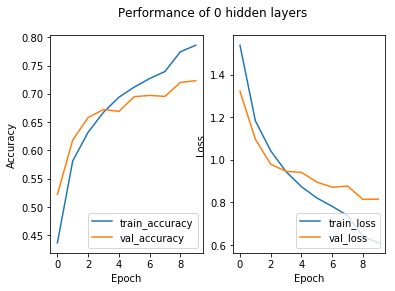

10000/10000 [==============================] - 4s 394us/step
test_loss: 0.8151454526901245
test_acc: 0.7232


In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Performance of 0 hidden layers')

ax1.plot(history.history['acc'], label='train_accuracy')
ax1.plot(history.history['val_acc'], label = 'val_accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')

ax2.plot(history.history['loss'], label='train_loss')
ax2.plot(history.history['val_loss'], label = 'val_loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='lower right')

plt.show()

#first we evaluate on the last weights of the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_loss: "+str(test_loss) + '\n' + "test_acc: "+ str(test_acc))

Adding our previously used learning rate reducer was sufficient to beat the comparison baseline model by about 2%. Next, we will experiment with SGD and momentum on more than 10 epochs. Hypothesizing that SGD with momentum is able to beat Adam on the task, given sufficient epochs.  

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                65600     
__________

In [13]:
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

from tensorflow.keras.callbacks import ReduceLROnPlateau 
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.000001, verbose=1)

history = model.fit(train_images, train_labels, epochs=50, 
                    validation_data=(test_images, test_labels),callbacks=[reduce_lr])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 67s 1ms/step - loss: 2.0166 - acc: 0.2634 - val_loss: 1.7865 - val_acc: 0.3662
Epoch 2/50
50000/50000 [==============================] - 61s 1ms/step - loss: 1.6869 - acc: 0.3937 - val_loss: 1.6010 - val_acc: 0.4102
Epoch 3/50
50000/50000 [==============================] - 60s 1ms/step - loss: 1.5001 - acc: 0.4583 - val_loss: 1.4548 - val_acc: 0.4755
Epoch 4/50
50000/50000 [==============================] - 61s 1ms/step - loss: 1.3850 - acc: 0.5034 - val_loss: 1.3219 - val_acc: 0.5274
Epoch 5/50
50000/50000 [==============================] - 61s 1ms/step - loss: 1.2945 - acc: 0.5394 - val_loss: 1.2785 - val_acc: 0.5351
Epoch 6/50
50000/50000 [==============================] - 60s 1ms/step - loss: 1.2234 - acc: 0.5681 - val_loss: 1.2590 - val_acc: 0.5581
Epoch 7/50
50000/50000 [==============================] - 62s 1ms/step - loss: 1.1565 - acc: 0.5924 - val_loss: 1.1431 - val_acc

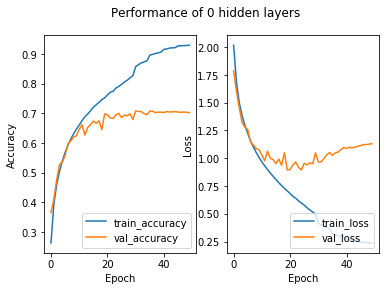

10000/10000 [==============================] - 4s 355us/step
test_loss: 1.1306213013648987
test_acc: 0.7019


In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Performance of 0 hidden layers')

ax1.plot(history.history['acc'], label='train_accuracy')
ax1.plot(history.history['val_acc'], label = 'val_accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')

ax2.plot(history.history['loss'], label='train_loss')
ax2.plot(history.history['val_loss'], label = 'val_loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='lower right')

plt.show()

#first we evaluate on the last weights of the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_loss: "+str(test_loss) + '\n' + "test_acc: "+ str(test_acc))

The results are disappointing. After the first scheduled learning rate decay, the network was unable to improve it's test accuracy but only got worse in terms of validation accuracy. Maybe the learning rate decay occurred at an unfortunate time, where SGD just diverged in a "wrong" direction and the smaller learning rate was making it more unlikely to return back to the previous better state. Given that we can observe overfitting and can use approximately the same amount of parameters, but have no restrictions on computation time, a good idea would be to rerun the network using L2 regularization or Dropout layers. For fareness sake, we would have to run the same configuration with Adam as well though. Since this takes quite some time, we stop pursuing further improvement than the 0.02 increase in test accuracy, which we achieved with the original model + scheduled learning rate decay. 